In [ ]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (20, 15) 

#In case your Open CV version do not support SIFT
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
#Download the left and right perspective of site images 
!gdown --id '1RNCdBF9a4fIdcyPvjelyx7dsheLgRoaQ' --output leftSite.jpg
!gdown --id '1zHAtikO9dVHpLPJ-KQPdvKEC-wLB1hHM' --output rightSite.jpg

Downloading...
From: https://drive.google.com/uc?id=1RNCdBF9a4fIdcyPvjelyx7dsheLgRoaQ
To: /content/leftSite.jpg
100% 576k/576k [00:00<00:00, 8.98MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zHAtikO9dVHpLPJ-KQPdvKEC-wLB1hHM
To: /content/rightSite.jpg
100% 554k/554k [00:00<00:00, 8.79MB/s]


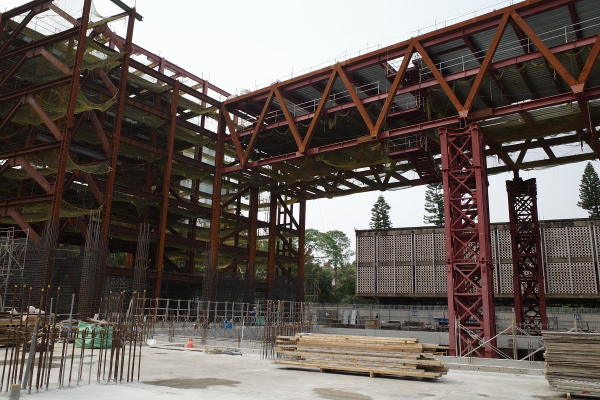

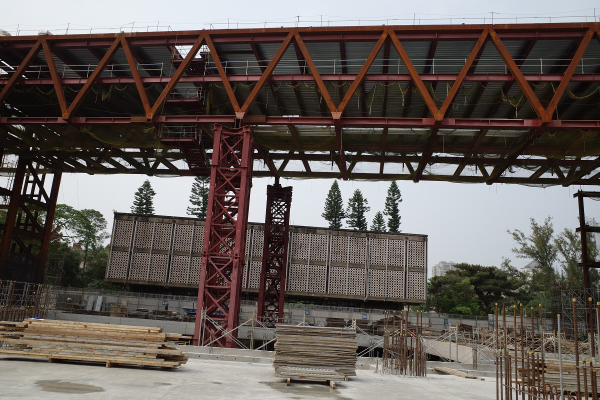

In [ ]:
#Read the left and right perspective of site images 
img1_bgr = cv2.imread('leftSite.jpg')
img2_bgr  = cv2.imread('rightSite.jpg')

#Resize images for convenience
def resizeimg (img):
  img_resize = cv2.resize(img, (int(img.shape[1]*0.5),int(img.shape[0]*0.5)), interpolation = cv2.INTER_AREA)
  return img_resize 

img1_bgr = resizeimg(img1_bgr)
img2_bgr = resizeimg(img2_bgr)

#display the images
cv2_imshow(img1_bgr)
cv2_imshow(img2_bgr)

In [ ]:
# Converting images to gray scale
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)

# create a SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# matching descriptor vectors with a FLANN based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []

# Filter matches using the Lowe's ratio test
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Epipolar Geometry

- **Part A:**
<br>Estimate the fundamental matrix F automatically using normalized 8-point algorithm with SVD 

- **Part B:**
<br>Based on Part A, find the best fundamental matrix F automatically using RANSAC
<br>
- **Hint:** 
<br>The step-by-step solution to the estimation of fundamental matrix F using normaized 8-points algorithm with SVD and RANSAC can be found in the link below:<br>

  - https://www.cc.gatech.edu/classes/AY2016/cs4476_fall/results/proj3/html/sdai30/index.html

  - and the procedure for estimating F using normalized 8-point algorithm can be simply illustrated as following four steps (Hartley, 1995):
    1. Center the image data at the origin, and scale it so the mean squared distance between the origin and the data points is 2 pixels
    2. Use the eight-point algorithm to compute F from the normalized points (the algorithm is shown in lecture slides)
    3. Enforce the rank-2 constraint (for example, take SVD of F and throw out the smallest singular value)
    4. Transform fundamental matrix back to original units: if $T$ and $T'$ are the normalizing transformations in the two images, than the fundamental matrix in original coordinates is 
$T'^{T}HT$.


# Homography

- **Part C:**
<br>Estimate the homography H automatically using normalized 4-point algorithm with SVD 

- **Hint:** 
<br>The step-by-step solution to the estimation of homography H using normaized 4-points algorithm with SVD can be found in the links below:<br>

  - https://engineering.purdue.edu/kak/courses-i-teach/ECE661.08/solution/hw4_s1.pdf
  - https://cseweb.ucsd.edu/classes/wi07/cse252a/homography_estimation/homography_estimation.pdf



part A: didnt use normalized 8-point algorithm with SVD
part B: didnt use RANSAC
part C: didnt use normalized 4-point algorithm with SVD
part D: no point cloud model screenshot